In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  

Target variable (first 5 values):
0    15
1     7
2     9
3    10
4     7
Name: Class_number_of_rings, dtype: category
Categories (28, object): ['1', '10', '11', '12', ..., '6', '7', '8', '9']
Silhouette Score for 3 clusters: 0.3463


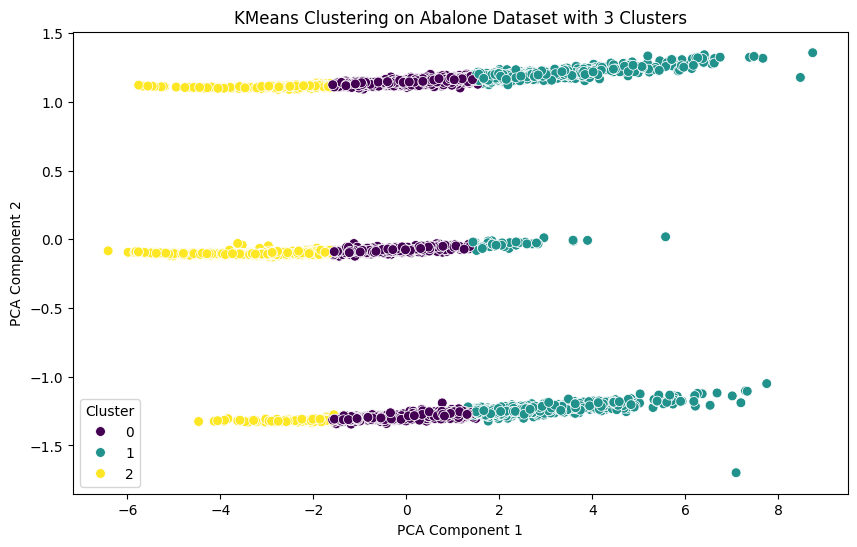


Cluster Centers (in original feature space):
        Sex    Length  Diameter    Height  Whole_weight  Shucked_weight  \
0  1.070898  0.537496  0.418919  0.141795      0.774714        0.332746   
1  1.003934  0.647293  0.510012  0.179430      1.415966        0.618199   
2  1.079516  0.368129  0.279002  0.092226      0.265331        0.115276   

   Viscera_weight  Shell_weight  
0        0.168575      0.227863  
1        0.309671      0.397696  
2        0.056967      0.080892  


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


abalone_data = fetch_openml(name='abalone', version=1, as_frame=True)
X = abalone_data.data.copy()  
y = abalone_data.target       # Dependent target variable (Rings)


print(X.head())
print(f"\nTarget variable (first 5 values):\n{y.head()}")


X['Sex'] = LabelEncoder().fit_transform(X['Sex'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_


silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.4f}")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans, palette='viridis', s=50)
plt.title(f"KMeans Clustering on Abalone Dataset with {n_clusters} Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("\nCluster Centers (in original feature space):")
print(cluster_centers_df)
